# Dataset Description

In [42]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Melbourne House Price').getOrCreate()

In [43]:
# create a dataframe
melb_house_price_raw_df = spark.read.csv('melb_dataori.csv',inferSchema=True,header=True)

#### 1. General Discription of Dataset

In [44]:
# show number of rows and columns
print((melb_house_price_raw_df.count(),len(melb_house_price_raw_df.columns)))

(13580, 21)


In [45]:
# show type of each column
melb_house_price_raw_df.printSchema()

root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: double (nullable = true)
 |-- Bedroom2: double (nullable = true)
 |-- Bathroom: double (nullable = true)
 |-- Car: double (nullable = true)
 |-- Landsize: double (nullable = true)
 |-- BuildingArea: double (nullable = true)
 |-- YearBuilt: double (nullable = true)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: double (nullable = true)



In [46]:
melb_house_price_raw_df.describe().toPandas()

,summary,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,count,13580,13580,13580,13580,13580,13580,13580,13580,13580,...,13580,13518,13580,7130,8205,12211,13580,13580,13580,13580
1,mean,None,None,2.9379970544919,None,1075684.079455081,None,None,None,10.137776141384117,...,1.5342415316642122,1.6100754549489569,558.4161266568483,151.96764988779805,1964.6842169408897,None,-37.809202733431505,144.99521618777578,None,7454.417378497791
2,stddev,None,None,0.9557479384215565,None,639310.7242960163,None,None,None,5.868724943071715,...,0.6917117224588424,0.962633519245631,3990.669241109034,541.0145376263513,37.27376222396062,None,0.07925982260355832,0.10391556140730973,None,4378.581771795497
3,min,Abbotsford,1 Adelle Ct,1,h,85000.0,PI,@Realty,1/07/2017,0.0,...,0.0,0.0,0.0,0.0,1196.0,Banyule,-38.18255,144.43181,Eastern Metropolitan,249.0
4,max,Yarraville,9b Stewart St,10,u,9000000.0,VB,iTRAK,9/09/2017,48.1,...,8.0,10.0,433014.0,44515.0,2018.0,Yarra Ranges,-37.40853,145.52635,Western Victoria,21650.0


## Data Preparation

#### 1.Data Cleaning

For this dataset, Three columns "BuildingArea", "YearBuilt" and "Car" have many empty cells. But these three columns are related to the price. 

In [47]:
df_drop=melb_house_price_raw_df.na.drop()
df_drop.count()

6196

Firstly, we try to drop all rows which have at least one empty cell in the row.When we drop all rows which have at least one empty cell in the row, only 6196 rows remain. Thus, we chooose to fill empty cells with values instead of droping them.

In [48]:
# filling empty cells with mean in "BuildingArea" column
from pyspark.sql.functions import mean

mean = melb_house_price_raw_df.select(mean(melb_house_price_raw_df['BuildingArea'])).collect()
print(mean[0][0])

mean_BuildingArea = mean[0][0]
dfgood_BuildingArea = melb_house_price_raw_df.na.fill(mean_BuildingArea,['BuildingArea'])
dfgood_BuildingArea.toPandas().head(5)

151.96764988779805


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [49]:
# filling empty cells with mean in "YearBuilt" column
from pyspark.sql.functions import mean

mean = dfgood_BuildingArea .select(mean(melb_house_price_raw_df['YearBuilt'])).collect()
print(mean[0][0])

mean_YearBuilt = mean[0][0]
dfgood_YearBuilt = dfgood_BuildingArea.na.fill(mean_YearBuilt,['YearBuilt'])
dfgood_YearBuilt.toPandas().head(5)

1964.6842169408897


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [50]:
# filling empty cells with mean in "Car" column
from pyspark.sql.functions import mean

mean = dfgood_YearBuilt.select(mean(melb_house_price_raw_df['Car'])).collect()
print(mean[0][0])

mean_Car = mean[0][0]
dfgood_Car = dfgood_YearBuilt.na.fill(mean_Car,['Car'])
dfgood_Car.toPandas().head(5)

1.6100754549489569


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Secondly, drop rows that have duplicate values in all columns, that means exact duplicates.

In [51]:
dfgood=dfgood_Car.dropDuplicates()
dfgood.count()

13580

This result shows there is no duplicated rows in this dataset.

In [52]:
dfgood.toPandas().head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Alphington,3/19 Harker St,2,u,525500.0,S,Miles,12/11/2016,6.4,3078.0,...,1.0,1.0,88.0,60.00000,1960.0,Darebin,-37.7791,145.0306,Northern Metropolitan,2211.0
1,Altona,4/57 Blyth St,3,u,730000.0,SP,Barlow,13/08/2016,13.8,3018.0,...,2.0,1.0,69.0,141.00000,2014.0,Hobsons Bay,-37.8680,144.8286,Western Metropolitan,5301.0
2,Avondale Heights,157 Canning St,3,t,851000.0,S,Nelson,3/12/2016,10.5,3034.0,...,3.0,1.0,557.0,181.00000,2017.0,Moonee Valley,-37.7700,144.8572,Western Metropolitan,4502.0
3,Balwyn North,1 Tovey St,5,h,1836000.0,S,Jellis,30/07/2016,9.2,3104.0,...,2.0,2.0,939.0,151.96765,1957.0,Boroondara,-37.7998,145.0862,Southern Metropolitan,7809.0
4,Bentleigh,15 Wilson St,4,h,1385000.0,S,hockingstuart,16/07/2016,13.0,3204.0,...,2.0,1.0,576.0,151.96765,1920.0,Glen Eira,-37.9152,145.0244,Southern Metropolitan,6795.0


Finally, we will remove all the rows that have empty cells in any of the columns. Thereafter, we will re-assign the results back to the melb_house_price_df DataFrame.

In [53]:
melb_house_price_df = dfgood.na.drop()
melb_house_price_df.count()

12211

#### 2. Column Select

In [54]:
from pyspark.sql import SparkSession

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
print((melb_house_price_df.count(),len(melb_house_price_df.columns)))

(12211, 21)


In [56]:
melb_house_price_df.printSchema()

root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: double (nullable = true)
 |-- Bedroom2: double (nullable = true)
 |-- Bathroom: double (nullable = true)
 |-- Car: double (nullable = false)
 |-- Landsize: double (nullable = true)
 |-- BuildingArea: double (nullable = false)
 |-- YearBuilt: double (nullable = false)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: double (nullable = true)



In [57]:

from pyspark.sql.functions import col
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType, IntegerType, StringType
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

In [58]:
categorical_columns = ['Suburb', 
                       'Address', 
                       'Type', 
                       'Method', 
                       'SellerG', 
                       'Date', 
                       'CouncilArea', 
                       'Regionname' ]
pipeline_stages = []   

for categorial_column in categorical_columns:
    string_indexer = StringIndexer(inputCol = categorial_column, 
                                   outputCol = categorial_column + 'Index')  
    encoder = OneHotEncoder(inputCols = [string_indexer.getOutputCol()],
        outputCols = [categorial_column + "classVec"])
    pipeline_stages += [string_indexer, encoder]

In [59]:
melb_house_price_df.printSchema() 

root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: double (nullable = true)
 |-- Bedroom2: double (nullable = true)
 |-- Bathroom: double (nullable = true)
 |-- Car: double (nullable = false)
 |-- Landsize: double (nullable = true)
 |-- BuildingArea: double (nullable = false)
 |-- YearBuilt: double (nullable = false)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: double (nullable = true)



In [60]:
print(pipeline_stages)

[StringIndexer_a7a9f9e9e3e7, OneHotEncoder_2d6e337cd6fc, StringIndexer_7a80985cfe0d, OneHotEncoder_008286d40253, StringIndexer_8808c996acbe, OneHotEncoder_103cfbfce5f0, StringIndexer_c29ad73b213f, OneHotEncoder_939986ee703d, StringIndexer_2185aabec0d8, OneHotEncoder_6bf4afed530c, StringIndexer_a5c75d31208c, OneHotEncoder_0a6e7e0b04bf, StringIndexer_0c28557a7444, OneHotEncoder_c083ef47639f, StringIndexer_a2874117360e, OneHotEncoder_bc4800ef2cfd]


In [61]:
pipeline = Pipeline(stages = pipeline_stages) 
pipeline_model = pipeline.fit(melb_house_price_df)

In [62]:
#change categories
melb_house_price_features_df = pipeline_model.transform(melb_house_price_df) 

melb_house_price_features_df.toPandas().head(8)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,MethodIndex,MethodclassVec,SellerGIndex,SellerGclassVec,DateIndex,DateclassVec,CouncilAreaIndex,CouncilAreaclassVec,RegionnameIndex,RegionnameclassVec
0,Alphington,3/19 Harker St,2,u,525500.0,S,Miles,12/11/2016,6.4,3078.0,...,0.0,"(1.0, 0.0, 0.0, 0.0)",15.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
1,Altona,4/57 Blyth St,3,u,730000.0,SP,Barlow,13/08/2016,13.8,3018.0,...,1.0,"(0.0, 1.0, 0.0, 0.0)",52.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",45.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"
2,Avondale Heights,157 Canning St,3,t,851000.0,S,Nelson,3/12/2016,10.5,3034.0,...,0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"
3,Balwyn North,1 Tovey St,5,h,1836000.0,S,Jellis,30/07/2016,9.2,3104.0,...,0.0,"(1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",39.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
4,Bentleigh,15 Wilson St,4,h,1385000.0,S,hockingstuart,16/07/2016,13.0,3204.0,...,0.0,"(1.0, 0.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",41.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
5,Bulleen,135 Manningham Rd,4,h,1085000.0,PI,Barry,10/12/2016,11.8,3105.0,...,2.0,"(0.0, 0.0, 1.0, 0.0)",3.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)"
6,Canterbury,21 Compton St,4,h,2950000.0,PI,Jellis,10/12/2016,9.0,3126.0,...,2.0,"(0.0, 0.0, 1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
7,Essendon,62 Mary St,3,h,855000.0,S,Nelson,12/06/2016,8.0,3040.0,...,0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",48.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"


In [63]:
#category into vector 
melb_house_price_features_df.printSchema() 

root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: double (nullable = true)
 |-- Bedroom2: double (nullable = true)
 |-- Bathroom: double (nullable = true)
 |-- Car: double (nullable = false)
 |-- Landsize: double (nullable = true)
 |-- BuildingArea: double (nullable = false)
 |-- YearBuilt: double (nullable = false)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: double (nullable = true)
 |-- SuburbIndex: double (nullable = false)
 |-- SuburbclassVec: vector (nullable = true)
 |-- AddressIndex: double (nullable = false)
 |-- AddressclassVec: v

In [64]:
# choose some features and show their correlations
from pyspark.sql.functions import corr

melb_house_price_features_df.select(corr('Rooms','Bedroom2')).show()
melb_house_price_features_df.select(corr('Distance','Price')).show()

+---------------------+
|corr(Rooms, Bedroom2)|
+---------------------+
|   0.9386380924047919|
+---------------------+

+---------------------+
|corr(Distance, Price)|
+---------------------+
| -0.14613720327802313|
+---------------------+



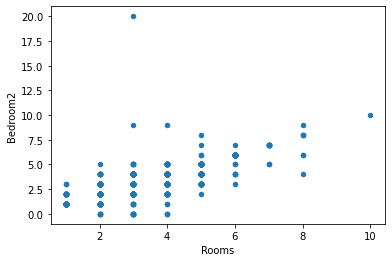

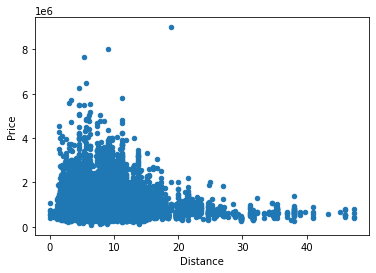

In [65]:
melb_house_price_features_df_pandas=melb_house_price_features_df.toPandas()
melb_house_price_features_df_pandas.plot.scatter(x='Rooms', y='Bedroom2')
melb_house_price_features_df_pandas.plot.scatter(x='Distance', y='Price')

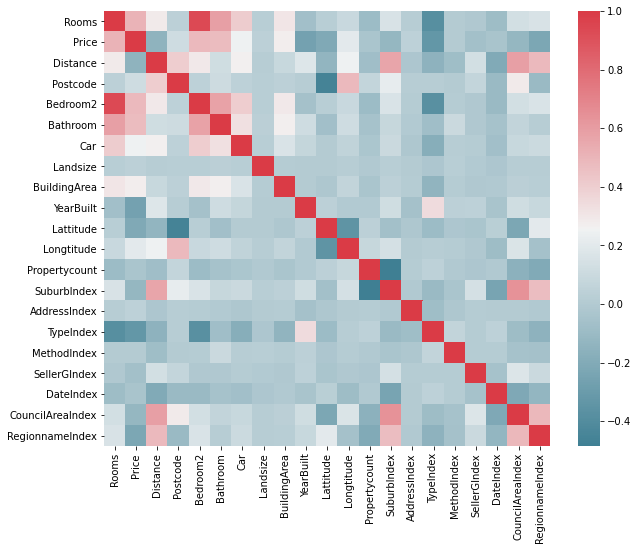

In [66]:
import seaborn as sns

plt.figure(figsize=(10,8)) 

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(melb_house_price_features_df_pandas.corr(), cmap=cmap)

In [67]:
melb_house_price_features_df.columns

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'SuburbIndex',
 'SuburbclassVec',
 'AddressIndex',
 'AddressclassVec',
 'TypeIndex',
 'TypeclassVec',
 'MethodIndex',
 'MethodclassVec',
 'SellerGIndex',
 'SellerGclassVec',
 'DateIndex',
 'DateclassVec',
 'CouncilAreaIndex',
 'CouncilAreaclassVec',
 'RegionnameIndex',
 'RegionnameclassVec']

In [68]:
# selected columns
assembled=VectorAssembler(inputCols=
    ['Rooms','TypeclassVec','MethodclassVec','Distance','Car','Bathroom',
     'Landsize','BuildingArea','YearBuilt','RegionnameclassVec','Propertycount'],outputCol='features')

In [69]:
features_df=assembled.transform(melb_house_price_features_df)
features_df.printSchema()

root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: double (nullable = true)
 |-- Bedroom2: double (nullable = true)
 |-- Bathroom: double (nullable = true)
 |-- Car: double (nullable = false)
 |-- Landsize: double (nullable = true)
 |-- BuildingArea: double (nullable = false)
 |-- YearBuilt: double (nullable = false)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: double (nullable = true)
 |-- SuburbIndex: double (nullable = false)
 |-- SuburbclassVec: vector (nullable = true)
 |-- AddressIndex: double (nullable = false)
 |-- AddressclassVec: v

In [70]:
features_df.select('features').show(8)

+--------------------+
|            features|
+--------------------+
|(21,[0,2,3,7,8,9,...|
|(21,[0,2,4,7,8,9,...|
|(21,[0,3,7,8,9,10...|
|(21,[0,1,3,7,8,9,...|
|(21,[0,1,3,7,8,9,...|
|(21,[0,1,5,7,8,9,...|
|(21,[0,1,5,7,8,9,...|
|(21,[0,1,3,7,8,9,...|
+--------------------+
only showing top 8 rows



In [71]:
model_df=features_df.select('features','Price')
model_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Price: double (nullable = true)



In [72]:
model_df.show(5)

+--------------------+---------+
|            features|    Price|
+--------------------+---------+
|(21,[0,2,3,7,8,9,...| 525500.0|
|(21,[0,2,4,7,8,9,...| 730000.0|
|(21,[0,3,7,8,9,10...| 851000.0|
|(21,[0,1,3,7,8,9,...|1836000.0|
|(21,[0,1,3,7,8,9,...|1385000.0|
+--------------------+---------+
only showing top 5 rows



In [73]:
print((model_df.count(),len(model_df.columns)))

(12211, 2)


# Machine Learning models

In [74]:
training_set, test_set =model_df.randomSplit([0.7, 0.3], seed=999999)

print("Number of rows in Training Set:",training_set.count())
print("Number of rows in Test Set:",test_set.count())

Number of rows in Training Set: 8459
Number of rows in Test Set: 3752


In [75]:
target_column = 'Price'

## 1. Random Forest Regression Model

In [77]:
rf = RandomForestRegressor(featuresCol="features", labelCol= target_column)
rf_model = rf.fit(training_set)
predictions = rf_model.transform(training_set)
evaluator_rmse = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="r2")
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on trainging data = %g" % rmse)
print("Mean Abosolute Error (MAE) on training data = %g" % mae)
print("R2 on training data = %g" % r2)

Root Mean Squared Error (RMSE) on trainging data = 360488
Mean Abosolute Error (MAE) on training data = 238525
R2 on training data = 0.668156


In [78]:
predictions = rf_model.transform(test_set)
evaluator_rmse = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="r2")
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print("Mean Abosolute Error (MAE) on test data = %g" % mae)
print("R2 on test data = %g" % r2)

Root Mean Squared Error (RMSE) on test data = 405662
Mean Abosolute Error (MAE) on test data = 249385
R2 on test data = 0.630271


## 2. Linear Regression Model

In [79]:
linear_regression = LinearRegression(featuresCol = 'features', labelCol = target_column)
linear_regression_model = linear_regression.fit(training_set)

In [80]:
training_summary = linear_regression_model.summary
print("RMSE: %f" % training_summary.rootMeanSquaredError)
print("MAE: %f" % training_summary.meanAbsoluteError)
print("R-SQUARED: %f" % training_summary.r2)
print("TRAINING DATASET DESCRIPTIVE SUMMARY: ")
training_set.describe().show()
print("TRAINING DATASET RESIDUALS: ")
training_summary.residuals.show()

RMSE: 393699.026643
MAE: 268293.295216
R-SQUARED: 0.604195
TRAINING DATASET DESCRIPTIVE SUMMARY: 
+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|              8459|
|   mean|1058004.4653032273|
| stddev| 625819.6887796315|
|    min|           85000.0|
|    max|         8000000.0|
+-------+------------------+

TRAINING DATASET RESIDUALS: 
+-------------------+
|          residuals|
+-------------------+
|-152209.65095798858|
|-147929.29760332312|
|  1602937.954296864|
| -319300.4251161674|
| -343565.9856731538|
|-164719.99830780365|
| 428165.61831567157|
| 27612.573869545013|
|  699529.1846052455|
|-207607.73924816633|
| 165392.60012536217|
| -246617.8839097619|
| -220773.6001132764|
| -139985.0036473591|
|  405690.3259708481|
| -215907.5529681458|
| -89072.99096654821|
| -178765.3294676412|
|-170584.88982760534|
|-166586.46263649408|
+-------------------+
only showing top 20 rows



In [81]:
test_linear_regression_predictions_df = linear_regression_model.transform(test_set)
print("TEST DATASET PREDICTIONS AGAINST ACTUAL TARGET VALUES: ")
test_linear_regression_predictions_df.select("prediction", target_column).show(10)

TEST DATASET PREDICTIONS AGAINST ACTUAL TARGET VALUES: 
+------------------+---------+
|        prediction|    Price|
+------------------+---------+
| 1904549.499079335|1540000.0|
| 764481.5062299361| 850000.0|
| 926206.9077458335| 810000.0|
|1075441.9977747472| 847000.0|
|1056130.6234226152| 580000.0|
|1639315.1800377439|1090000.0|
|1943847.2963377843|1490000.0|
| 1603126.050839107|1650000.0|
| 930884.2679889025| 582000.0|
| 1073965.635846584| 880000.0|
+------------------+---------+
only showing top 10 rows



In [82]:
test_summary = linear_regression_model.evaluate(test_set)
print("RMSE on Test Data = %g" % test_summary.rootMeanSquaredError)
print("MAE on Test Data = %g" % test_summary.meanAbsoluteError)
print("R-SQUARED on Test Data = %g" % test_summary.r2)

RMSE on Test Data = 425818
MAE on Test Data = 273998
R-SQUARED on Test Data = 0.592618


In [83]:
spark.stop()